In [381]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Obtaining Data

In [459]:
btc = pd.read_csv('BTC.csv')
btc

,Date,Close/Last,Volume,Open,High,Low
0,01/17/2025,104581.0,NaN,100122.0,104624.0,104085.0
1,01/16/2025,101217.0,NaN,99604.9,102089.0,99956.2
2,01/15/2025,99589.9,NaN,97187.2,100812.0,99301.1
3,01/14/2025,97183.0,NaN,95120.1,97702.7,96501.9
4,01/13/2025,94984.1,NaN,94552.9,95268.4,94359.5
...,...,...,...,...,...,...
1855,03/12/2019,3886.0,NaN,3870.3,3900.1,3817.1
1856,03/11/2019,3865.1,NaN,3915.6,3935.5,3842.4
1857,03/10/2019,3915.2,NaN,3944.3,3944.5,3889.2
1858,03/09/2019,3944.4,NaN,3865.9,3964.0,3859.7


In [460]:
datetime = pd.to_datetime(btc['Date'], format='%m/%d/%Y').dt.strftime('%Y/%m/%d')
btc['Datetime'] = datetime
btc=btc[['Datetime','Close/Last','Open']]
btc

,Datetime,Close/Last,Open
0,2025/01/17,104581.0,100122.0
1,2025/01/16,101217.0,99604.9
2,2025/01/15,99589.9,97187.2
3,2025/01/14,97183.0,95120.1
4,2025/01/13,94984.1,94552.9
...,...,...,...
1855,2019/03/12,3886.0,3870.3
1856,2019/03/11,3865.1,3915.6
1857,2019/03/10,3915.2,3944.3
1858,2019/03/09,3944.4,3865.9


In [526]:
btc = btc[btc['Datetime']>='2022/01/01']
btc

,Datetime,Close/Last,Open
0,2025/01/17,104581.0,100122.0
1,2025/01/16,101217.0,99604.9
2,2025/01/15,99589.9,97187.2
3,2025/01/14,97183.0,95120.1
4,2025/01/13,94984.1,94552.9
...,...,...,...
892,2022/01/05,42947.9,46398.9
893,2022/01/04,46439.5,46096.5
894,2022/01/03,46069.1,46825.2
895,2022/01/02,46819.5,46919.1


In [527]:
transformed_data = []

# Loop to create the desired structure
for i in range(5, len(btc) - 7): 
    current_date = btc['Datetime'].iloc[i] 
    past_close = btc['Close/Last'][i-5:i].values 
    next_close_diff = btc['Open'][i+1:i+8].values - btc['Close/Last'][i-1] 
    
    row = [current_date] + list(past_close) + list(next_close_diff)
    transformed_data.append(row)

columns = ['Datetime'] + [f'Close_Day_{-i}' for i in range(5, 0, -1)] + [f'Close_Diff_Day_{i}' for i in range(1, 8)]
transformed_df = pd.DataFrame(transformed_data, columns=columns)
transformed_df

,Datetime,Close_Day_-5,Close_Day_-4,Close_Day_-3,Close_Day_-2,Close_Day_-1,Close_Diff_Day_1,Close_Diff_Day_2,Close_Diff_Day_3,Close_Diff_Day_4,Close_Diff_Day_5,Close_Diff_Day_6,Close_Diff_Day_7
0,2025/01/12,104581.0,101217.0,99589.9,97183.0,94984.1,-922.3,-1213.1,-555.5,1292.5,6704.9,4485.8,3371.7
1,2025/01/11,101217.0,99589.9,97183.0,94984.1,94524.3,-753.3,-95.7,1752.3,7164.7,4945.6,3831.5,3469.5
2,2025/01/10,99589.9,97183.0,94984.1,94524.3,94609.7,-181.1,1666.9,7079.3,4860.2,3746.1,3384.1,2183.6
3,2025/01/09,97183.0,94984.1,94524.3,94609.7,93910.4,2366.2,7778.6,5559.5,4445.4,4083.4,2882.9,1754.2
4,2025/01/08,94984.1,94524.3,94609.7,93910.4,93724.0,7965.0,5745.9,4631.8,4269.8,3069.3,1940.6,-196.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,2022/01/12,42026.6,42721.7,43069.7,42878.6,42747.6,-422.1,-549.1,-938.2,-845.4,-1090.9,303.4,3651.3
881,2022/01/11,42721.7,43069.7,42878.6,42747.6,43618.7,-1420.2,-1809.3,-1716.5,-1962.0,-567.7,2780.2,2477.8
882,2022/01/10,43069.7,42878.6,42747.6,43618.7,42576.5,-767.1,-674.3,-919.8,474.5,3822.4,3520.0,4248.7
883,2022/01/09,42878.6,42747.6,43618.7,42576.5,42191.0,-288.8,-534.3,860.0,4207.9,3905.5,4634.2,4728.1


In [462]:
transformed_data = []

for i in range(5, len(btc) - 7):  
    current_date = btc['Datetime'].iloc[i] 
    past_close = btc['Close/Last'][i-5:i].values 
    next_open = btc['Open'][i+1:i+8].values  

    row = [current_date] + list(past_close) + list(next_open)
    transformed_data.append(row)

# Create the transformed DataFrame
columns = ['Datetime'] + [f'Close_Day_{-i}' for i in range(5, 0, -1)] + [f'Open_Day_{i}' for i in range(1, 8)]
transformed_df = pd.DataFrame(transformed_data, columns=columns)
transformed_df

,Datetime,Close_Day_-5,Close_Day_-4,Close_Day_-3,Close_Day_-2,Close_Day_-1,Open_Day_1,Open_Day_2,Open_Day_3,Open_Day_4,Open_Day_5,Open_Day_6,Open_Day_7
0,2025/01/12,104581.0,101217.0,99589.9,97183.0,94984.1,94061.8,93771.0,94428.6,96276.6,101689.0,99469.9,98355.8
1,2025/01/11,101217.0,99589.9,97183.0,94984.1,94524.3,93771.0,94428.6,96276.6,101689.0,99469.9,98355.8,97993.8
2,2025/01/10,99589.9,97183.0,94984.1,94524.3,94609.7,94428.6,96276.6,101689.0,99469.9,98355.8,97993.8,96793.3
3,2025/01/09,97183.0,94984.1,94524.3,94609.7,93910.4,96276.6,101689.0,99469.9,98355.8,97993.8,96793.3,95664.6
4,2025/01/08,94984.1,94524.3,94609.7,93910.4,93724.0,101689.0,99469.9,98355.8,97993.8,96793.3,95664.6,93527.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2020/01/12,8860.9,8800.9,8659.6,8662.6,8547.2,8120.3,7817.1,7969.5,8353.5,7844.3,7539.3,7466.9
1612,2020/01/11,8800.9,8659.6,8662.6,8547.2,8130.8,7817.1,7969.5,8353.5,7844.3,7539.3,7466.9,7340.8
1613,2020/01/10,8659.6,8662.6,8547.2,8130.8,8075.1,7969.5,8353.5,7844.3,7539.3,7466.9,7340.8,7200.6
1614,2020/01/09,8662.6,8547.2,8130.8,8075.1,8126.0,8353.5,7844.3,7539.3,7466.9,7340.8,7200.6,7145.5


In [528]:
x=transformed_df.iloc[:,1:6]
y=transformed_df.iloc[:,6:]
x.shape,y.shape

((885, 5), (885, 7))

# Feature Selection

In [529]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x) 


# x_back = scaler.inverse_transform(x_scaled)

In [530]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y) 


# y_back = scaler.inverse_transform(y_scaled)

In [531]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=1)
x_train.shape,y_train.shape,x_test.shape, x_val.shape, y_test.shape, y_val.shape

((619, 5), (619, 7), (133, 5), (133, 5), (133, 7), (133, 7))

In [152]:
# def windowed_df_to_date_X_y(windowed_dataframe):
#   df_as_np = windowed_dataframe.to_numpy()

#   dates = df_as_np[:, 0]

#   middle_matrix = df_as_np[:, 1:-1]
#   X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

#   Y = df_as_np[:, -1]

#   return dates, X.astype(np.float32), Y.astype(np.float32)

# dates, X, y = windowed_df_to_date_X_y(windowed_df)

# dates.shape, X.shape, y.shape

((2265,), (2265, 3, 1), (2265,))

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [532]:
x_train_tt = torch.tensor(x_train,dtype=torch.float64).float()
y_train_tt = torch.tensor(y_train,dtype=torch.float64).float()
x_val_tt = torch.tensor(x_val,dtype=torch.float64).float()
y_val_tt = torch.tensor(y_val,dtype=torch.float64).float()
x_test_tt = torch.tensor(x_test,dtype=torch.float64).float()
y_test_tt = torch.tensor(y_test,dtype=torch.float64).float()

x_train_tt.shape, x_test_tt.shape, x_val_tt.shape, y_train_tt.shape, y_val_tt.shape, y_test_tt.shape

(torch.Size([619, 5]),
 torch.Size([133, 5]),
 torch.Size([133, 5]),
 torch.Size([619, 7]),
 torch.Size([133, 7]),
 torch.Size([133, 7]))

In [533]:
class LSTM(nn.Module):
    def __init__(self, input_size=5, hidden_size=512, num_layers=6, output_size=7):
        super(LSTM, self).__init__()
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        # Fully connected intermediate layer
        self.fc = nn.Linear(hidden_size, output_size)  
        
        

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)  
        
        out = lstm_out[:, -1, :] 
        
        out = self.fc(out)
        
        return out

In [534]:
input_size = x_train_tt.shape[1]
model = LSTM().to('cpu')

In [535]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(x_train_tt, y_train_tt)
test_dataset = TimeSeriesDataset(x_test_tt, y_test_tt)
val_dataset = TimeSeriesDataset(x_val_tt, y_val_tt)

In [536]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [545]:
# Training Loop
num_epochs = 50
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
val_loss_list=[]

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for x_batch, y_batch in train_loader:
        x_batch = x_batch.unsqueeze(1)  

        optimizer.zero_grad()
        outputs = model(x_batch) 
        loss = criterion(outputs.squeeze(), y_batch) 
        loss.backward()  
        optimizer.step() 
        train_loss += loss.item()

    # Validation Loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch = x_batch.unsqueeze(1) 

            outputs = model(x_batch) 
            loss = criterion(outputs.squeeze(), y_batch) 
            val_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}')
    
    val_loss_list.append(val_loss/len(val_loader))
epochs = np.arange(1,num_epochs+1)

# --- Testing ---
X_test_tensor = x_test_tt 
y_test_tensor = y_test_tt 

# Reshape the test data
X_test_tensor = X_test_tensor.unsqueeze(1) 

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().cpu().numpy() 

print(predictions)


Epoch [1/50], Train Loss: 0.9143, Val Loss: 0.9709
Epoch [2/50], Train Loss: 0.9013, Val Loss: 0.9714
Epoch [3/50], Train Loss: 0.9091, Val Loss: 0.9718
Epoch [4/50], Train Loss: 0.9196, Val Loss: 0.9689
Epoch [5/50], Train Loss: 0.9018, Val Loss: 0.9705
Epoch [6/50], Train Loss: 0.9148, Val Loss: 0.9724
Epoch [7/50], Train Loss: 0.9346, Val Loss: 0.9704
Epoch [8/50], Train Loss: 0.9222, Val Loss: 0.9733
Epoch [9/50], Train Loss: 0.9543, Val Loss: 0.9720
Epoch [10/50], Train Loss: 0.9362, Val Loss: 0.9712
Epoch [11/50], Train Loss: 0.9010, Val Loss: 0.9698
Epoch [12/50], Train Loss: 0.9041, Val Loss: 0.9707
Epoch [13/50], Train Loss: 0.9162, Val Loss: 0.9724
Epoch [14/50], Train Loss: 1.2366, Val Loss: 0.9709
Epoch [15/50], Train Loss: 0.9368, Val Loss: 0.9707
Epoch [16/50], Train Loss: 0.9090, Val Loss: 0.9685
Epoch [17/50], Train Loss: 0.9086, Val Loss: 0.9689
Epoch [18/50], Train Loss: 0.9266, Val Loss: 0.9697
Epoch [19/50], Train Loss: 0.9122, Val Loss: 0.9719
Epoch [20/50], Train 

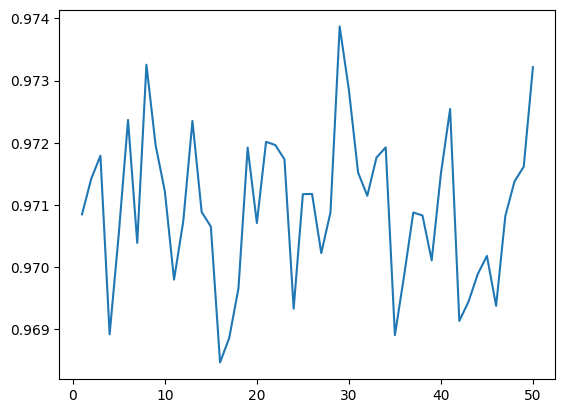

In [548]:
plt.plot(epochs,np.array(val_loss_list))
plt.show()

In [565]:
import joblib

model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor.to('cpu')).numpy()
columns=[f'predicted{i+1}' for i in range(7)] + [f'actual{i+1}' for i in range(7)]
print(y_test_tensor.numpy().shape, predicted.shape)
y_scaler=StandardScaler()
y_scaler.fit(y)
actual=y_scaler.inverse_transform(y_test_tensor.numpy())
predicted=y_scaler.inverse_transform(predicted)
joblib.dump(y_scaler, 'scaler.save') 
validate=pd.DataFrame(np.column_stack((actual,predicted)), columns=columns)
validate

(133, 7) (133, 7)


,predicted1,predicted2,predicted3,predicted4,predicted5,predicted6,predicted7,actual1,actual2,actual3,actual4,actual5,actual6,actual7
0,617.900024,-110.200005,-148.900009,-153.500000,253.299988,175.599991,309.399994,112.366966,204.007172,288.502289,335.177277,356.175049,372.437103,358.610382
1,-2437.399902,-3912.000000,-183.699997,345.800018,-124.200005,2332.100098,979.900085,-376.029205,-549.671021,-707.736511,-890.873596,-1121.262085,-1288.214111,-1464.162231
2,-2000.400146,152.500000,97.700012,1927.800049,1170.700073,1821.899902,5255.800293,112.366966,204.007172,288.502289,335.177277,356.175049,372.437103,358.610382
3,3692.700195,1161.699951,6596.700195,-721.000000,-800.500000,8.699998,-232.799988,-376.029724,-549.670837,-707.737610,-890.875671,-1121.262329,-1288.216675,-1464.162842
4,464.500031,641.200012,1009.099976,263.499969,-13.399987,843.000000,104.699966,112.366966,204.007172,288.502289,335.177277,356.175049,372.437103,358.610382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4042.899902,4214.599609,3599.099854,1727.900024,2682.400146,1351.099976,2576.399902,-376.029205,-549.671021,-707.736511,-890.873596,-1121.262085,-1288.214111,-1464.162231
129,-1787.800049,-2033.699951,-2040.900024,-2025.800049,-1932.399902,-1521.199951,-2207.899902,112.366966,204.007172,288.502289,335.177277,356.175049,372.437103,358.610382
130,-6274.500000,-7944.200195,-8840.000977,-8191.399902,-7576.200195,-8590.199219,-10583.100586,-376.029266,-549.671021,-707.736633,-890.873901,-1121.262085,-1288.214478,-1464.162231
131,562.400024,-441.299988,-744.200012,-871.199951,-1260.299927,-1167.500000,-1413.000000,112.366966,204.007172,288.502289,335.177277,356.175049,372.437103,358.610382


In [550]:
diff = abs(predicted-actual)
difference=pd.DataFrame(diff,columns=[f'difference{i+1}' for i in range(7)])
difference

,difference1,difference2,difference3,difference4,difference5,difference6,difference7
0,505.533051,314.207184,437.402283,488.677277,102.875061,196.837112,49.210388
1,2061.370605,3362.329102,524.036499,1236.673584,997.062073,3620.314209,2444.062256
2,2112.767090,51.507172,190.802277,1592.622803,814.525024,1449.462769,4897.189941
3,4068.729980,1711.370850,7304.437988,169.875671,320.762329,1296.916626,1231.362793
4,352.133057,437.192841,720.597656,71.677307,369.575043,470.562897,253.910416
...,...,...,...,...,...,...,...
128,4418.929199,4764.270508,4306.836426,2618.773682,3803.662109,2639.313965,4040.562012
129,1900.166992,2237.707031,2329.402344,2360.977295,2288.574951,1893.637085,2566.510254
130,5898.470703,7394.529297,8132.264160,7300.525879,6454.937988,7301.984863,9118.938477
131,450.033051,645.307129,1032.702271,1206.377197,1616.474976,1539.937134,1771.610352


In [551]:
avg_diff=difference.mean()
avg_diff

difference1    1747.725708
difference2    1941.164429
difference3    2203.709473
difference4    2356.341797
difference5    2541.916016
difference6    2867.267822
difference7    3061.661377
dtype: float32

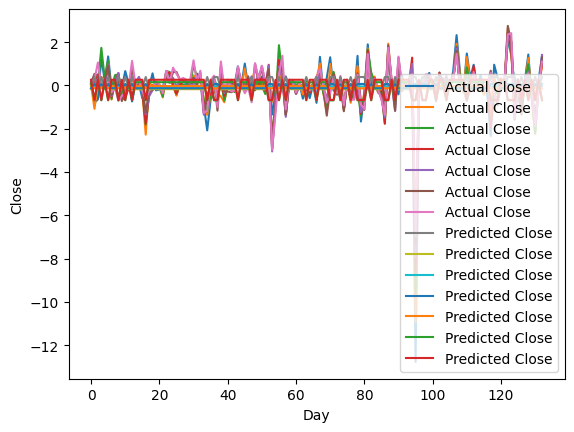

In [ ]:
model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor.to('cpu')).numpy()

plt.plot(y_test_tensor, label='Actual Difference')
plt.plot(predicted, label='Predicted Difference')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [553]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([2048, 5])
lstm.weight_hh_l0 	 torch.Size([2048, 512])
lstm.bias_ih_l0 	 torch.Size([2048])
lstm.bias_hh_l0 	 torch.Size([2048])
lstm.weight_ih_l1 	 torch.Size([2048, 512])
lstm.weight_hh_l1 	 torch.Size([2048, 512])
lstm.bias_ih_l1 	 torch.Size([2048])
lstm.bias_hh_l1 	 torch.Size([2048])
lstm.weight_ih_l2 	 torch.Size([2048, 512])
lstm.weight_hh_l2 	 torch.Size([2048, 512])
lstm.bias_ih_l2 	 torch.Size([2048])
lstm.bias_hh_l2 	 torch.Size([2048])
lstm.weight_ih_l3 	 torch.Size([2048, 512])
lstm.weight_hh_l3 	 torch.Size([2048, 512])
lstm.bias_ih_l3 	 torch.Size([2048])
lstm.bias_hh_l3 	 torch.Size([2048])
lstm.weight_ih_l4 	 torch.Size([2048, 512])
lstm.weight_hh_l4 	 torch.Size([2048, 512])
lstm.bias_ih_l4 	 torch.Size([2048])
lstm.bias_hh_l4 	 torch.Size([2048])
lstm.weight_ih_l5 	 torch.Size([2048, 512])
lstm.weight_hh_l5 	 torch.Size([2048, 512])
lstm.bias_ih_l5 	 torch.Size([2048])
lstm.bias_hh_l5 	 torch.Size([2048])
fc.weight 

In [561]:
torch.save(model, 'lstm.pt')

In [563]:
model_scripted = torch.jit.script(model)
model_scripted.save('lstm_scripted.pt')